- Veri toplama sürecindeki bir hata aykırı değerler oluşturabilir. Örneğin, değerlerin bin dolar olarak depolandığı excel'deki bir maaş sütunu için, 100 yerine 100.000 yazıyorsak, o zaman bu yaptığımız yazım hatası nedeniyle bir aykırı değer olacaktır. Ölçüm hataları da bu tür başka bir kaynaktır.

- Bazen, verileri üreten süreçler aykırı değerler olarak kabul edilebilecek aşırı ve nadir değerler üretir. Bu durumda, anormal veriler bir ölçüm hatasından değil, çok veri üretme işleminden kaynaklanmaktadır. Ancak, bu anormal veriler nadir olmalıdır.

- neden aykırı değerleri sevmiyoruz
- aykırı değerlerin bulunması
- aykırı değerler nasıl düzeltilir

aykırı değerlerin kategorik olanlar için değil sürekli değişkenler için tanımlandığını vurgulamak istiyoruz.

# 1. Aykırı değerleri sevmiyor muyuz?
Aykırı olanları sevmek ya da sevmemek, görevimizin ne olduğuyla ilgilidir. Veri bilimindeki uygulamaların çoğu için aykırı değerlerden hoşlanmayız, çünkü:

- Verilerin açıklama ölçütlerini başka tarafa çekerler. Örnek olarak, bir değişkenin merkezi eğilimini düşünün. Ortalama en yaygın kullanılan merkezi eğilim istatistiklerinden biridir. Bununla birlikte, aykırı değerlerden muzdariptir.

- Bazı makine öğrenme modelleri aşırı değerlere duyarlıdır. Dolayısıyla, doğru tahminler alabilmek için bu değerleri veri kümemizden çıkarmamız gerekir.

# 2. Aykırı değerlerin bulunması
Aykırı değerlerin tespiti, bunların ele alınmasında ilk adımdır. Bununla birlikte, bir aykırı değerin ne olduğunu tanımlamak için altın bir kural olmadığını vurgulamalıyız! Aykırı değerlerden bahsederken, onların nadir ve aşırı değerlere sahip olduklarından emin olmalıyız. Ancak, nadirlik ve aşırılığı tanımlamak öznel bir yargıdır ve üzerinde çalıştığımız işe bağlıdır. Aykırı değerlerin tanımlanması için yaygın olarak kullanılan bazı eşikler vardır.

Genellikle, aykırı değerleri tanımlamak için standart sapma kullanırız. (ortalama - Tstandart sapma, ortalama + Tstandart sapma) aralığının dışında kalan değerler aykırı değerlerdir. Burada T threasholdu ifade eder. Uygulamalara bağlı olarak, 1.5, 2, 3 veya 5'e eşit olarak tanımlanması yaygındır. Ancak, daha önce de söylediğimiz gibi, threashold için kesin değer elimizdeki işe bağlı olarak karar vermemiz gereken bir şeydir.

Bu kontrol noktasında, aykırı değerlerin tespit edilmesinin iki ana yolunu ele alıyoruz:

Değişkenleri görselleştirmek,
İstatistiksel teknikleri kullanmak.
İkinci yol daha bilimsel ve güvenilirdir ancak birincinin uygulanması kolaydır. Görselleştirme ile başlayalım.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
youtube = pd.read_csv("youtube.csv")
youtube.columns = ['sira', 'derece', 'kanal_adi', 'video_sayisi', 'abone_sayisi', 'goruntulenme_sayisi']
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(youtube["goruntulenme_sayisi"], )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

<Figure size 800x550 with 1 Axes>

Sıkıştırılmış bir kutu gibi görünüyor ve değişkende çok fazla aykırı var gibi görünüyor. Bu kez whis=20 ayarlayarak deneyelim:

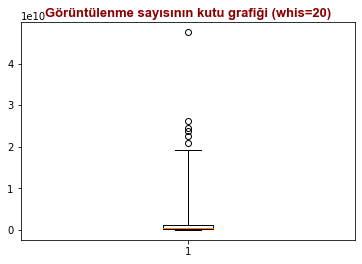

In [2]:
plt.boxplot(youtube["goruntulenme_sayisi"], whis=20)
plt.title("Görüntülenme sayısının kutu grafiği (whis=20)", fontdict=baslik_font)
plt.show()
# Aykırı değerlerin sayısı bu kez azaldı, çünkü eşiği oldukça yüksek tuttuk.

Aykırı değerlerin tespit edilmesinde bir başka yararlı grafik histogramlardır. Histogramlar değişkenlerin dağılımını gösterir. Dolayısıyla grafiğin en solunda ve en sağında yer alan değerler potansiyel aykırı değerlerdir. goruntulenme_sayisi değişkeninin histogramını çizelim:

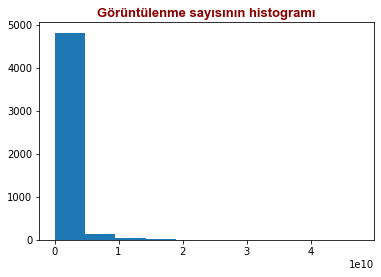

In [3]:
plt.hist(youtube["goruntulenme_sayisi"])
plt.title("Görüntülenme sayısının histogramı", fontdict=baslik_font)
plt.show()

Görselleştirme, potansiyel aykırı değerleri algılamanın kolay ve etkili bir yoludur, ancak özünde öznel bir inceleme türüdür. Şimdi aykırı değerlerin tespiti için bazı istatistiksel yöntemler sunacağız.

# 2.2. Aykırı değerlerin tespitinde istatistiksel yöntemler
### 2.2.1. Z-score
Bir değişkende aykırı değerler saptama yöntemlerinden birisi z-score dur. Z-score ilk önce verileri ölçeklendirir, böylece ortalaması 0 ve standart sapması 1 olur ve daha sonra bir değerin ortalamanın (0) ne kadar uzağında olduğunu ölçer. Bir değerin z-score'u ne kadar büyük olursa, o kadar büyük bir ihtimale aykırı değerdir. Bununla birlikte, bir değerin aykırı olduğunu söylemek için, z-score için bir eşik belirlememiz gerekir, bu sayede bu eşiğin üzerindeki skorların aykırı olduğu söylenir.

Scipy'ın zscore() işlevini kullanarak *goruntulenme_sayisi değişkeninin z-score'larını hesaplayalım ve eşik değerleri olarak 1, 2, 3 ve 4'ü ayarlayarak aykırı değerleri belirleyelim:

In [4]:
from scipy.stats import zscore

z_scores = zscore(youtube["goruntulenme_sayisi"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 361
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 167
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 95
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 64
------


### 2.2.2. Tukey'in yöntemi
Bu yöntem Çeyrekler Arası Aralık (IQR/ÇAA) yöntemi olarak da bilinir ve kutu grafiği yöntemi hakkında konuştuğumuzda bu yöntemi çalışırken görürüz. Daha önce söylediğimiz gibi, ÇAA birinci ve üçüncü çeyrekler arasındaki aralıktır. Bu yöntem ÇAA'nın 1,5 katı dışında olan tüm değerleri aykırı değerler olarak değerlendirir. Ancak, aralığı değiştirebiliriz ve 1.5 yerine başka bir eşik değeri ayarlayabiliriz.

Eşik değerleri olarak 1, 1.5, 2, ...., 4.5 kullanarak, Tukey'in metoduyla goruntulenme_sayisi değişkenindeki aykırı değerlerin sayısını bulalım: Burada Numpy kütüphanesindeki .percentile() fonksiyonunu kullacağız. Bu fonksiyon bize yüzde olarak parametrelere denk gelen değerleri döndürür. Eşik değerlerini ve aykırı değerlerin sayısını bir veri çerçevesine atalım.

In [5]:
q75, q25 = np.percentile(youtube["goruntulenme_sayisi"], [75 ,25])
caa = q75 - q25

In [6]:
esik_degerleri = pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((youtube["goruntulenme_sayisi"] > maks_deger)| 
                                       (youtube["goruntulenme_sayisi"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayisi': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri

,esik_degeri,aykiri_deger_sayisi
0,1.0,624.0
1,1.5,475.0
2,2.0,371.0
3,2.5,296.0
4,3.0,242.0
5,3.5,209.0
6,4.0,182.0
7,4.5,151.0


# 3. Aykırı değerler nasıl düzeltilir

- Aykırı değerleri veri kümemizden çıkarabiliriz.

- Aykırı değerlere yeni değerler atayarak sınırlayabiliriz.

- Onları analizimiz için zararsız bir değere dönüştürürüz.

### 3.1. Aykırı değerleri veri kümesinden çıkarma

- Aykırı değerlerin ölçüm hatasından veya veri toplama sürecindeki bir problemden kaynaklandığını biliyorsak, bunları çıkarmalıyız.

- Eğer aykırı değerleri çıkarmak sonraki aşamalarda anlamlı bir değişiklik yapmıyorsa, onları çıkarabiliriz. Ancak, analizimizi hem aykırı değerlerlerle hem de aykırı değerler olmadan yapmamız gerekir.

- Eğer aykırı değerleri çıkarmak takip eden aşamalarda anlamlı bir değişiklik yapıyorsa, ancak bunları ele almanın uygun bir yolunu bulamadıysak, onları veri kümemizden çıkarabiliriz.

### 3.2. Aykırı değerlerin sınırlandırılması
Aykırı değerlerin temel sorunu büyüklükleridir. Aykırı değerleri sınırlandırabilirsek, analizimiz üzerindeki etkileri sınırlı olacaktır. Aykırı değerleri sınırlandırmanın yaygın bir yoluna winsorization denir. winsorize etme tek yönlü veya iki yönlü olarak uygulanabilir. Tek yönlü winsorize etmede, ya değer dağılımının en düşük ucunu ya da en yüksek ucunu sınırlarız. İki yönlü de ise hem en düşük hem de en yüksek ucu sınırlandırırız.

winsorize etmede fikir, uç noktaların değerlerini belirli bir yüzdelik değere ayarlamaktır. Örneğin, dağıtımın en yüksek ucunun değerlerini  
95
  yüzdelik değerine ayarlayabiliriz. Benzer şekilde, en düşük ucun değerlerini  
5
  yüzdelik değerine ayarlayabiliriz.

Bir değişkeni scipy'ın winsorize() metodunu kullanarak winsorize edebiliriz. İki yönlü winsorize etmede parametre olarak ilk elemanın en düşük yüzdelik, ikinci elemanın ise en yüksek yüzdelik olduğu bir değer grubu verdik. Tek yönlü yüzdelik uygulamak istiyorsak, bu satırdaki ilgili öğeyi sıfıra(0) ayarlayabiliriz. Şimdi, goruntulenme_sayisi değişkenini winsorize edelim:

In [7]:
from scipy.stats.mstats import winsorize

winsorize_goruntulenme = winsorize(youtube["goruntulenme_sayisi"], (0, 0.10))

winsorize_goruntulenme

masked_array(data=[2468241402, 2468241402, 2468241402, ...,  311758426,
                     14563764,   73312511],
             mask=False,
       fill_value=999999,
            dtype=int64)

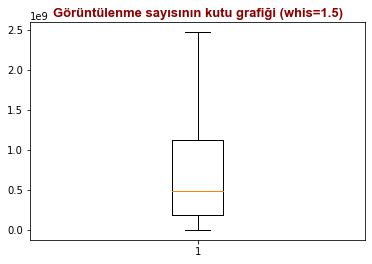

In [8]:
plt.boxplot(winsorize_goruntulenme)
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

### 3. Aykırı değerleri dönüştürme
Aykırı değerlerle başa çıkmanın başka bir yaygın yolu da değişkenin dönüşümüdür. Dönüşüm, yalnızca aykırı değerlerde değil, aynı zamanda normal olmayan veya normale yakın olmayan dağıtımlarda da bize yardımcı olur. Değişkeni dönüştürürken, genellikle monotonik dönüşümler uygularız. Bu dönüşümler, bir değişkendeki değerlerin göreceli sırasını değiştirmezler. Log dönüşümü ve karekök dönüşümü veri biliminde en çok kullanılan dönüşümlerdir.

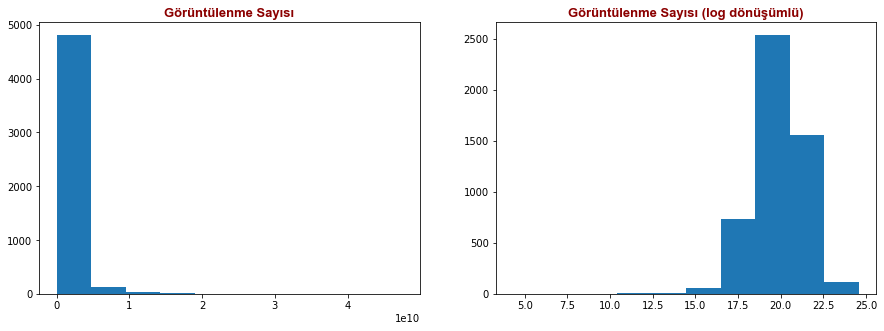

In [9]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(youtube["goruntulenme_sayisi"])
plt.title("Görüntülenme Sayısı", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(np.log(youtube["goruntulenme_sayisi"]))
plt.title("Görüntülenme Sayısı (log dönüşümlü)", fontdict=baslik_font)
plt.show()

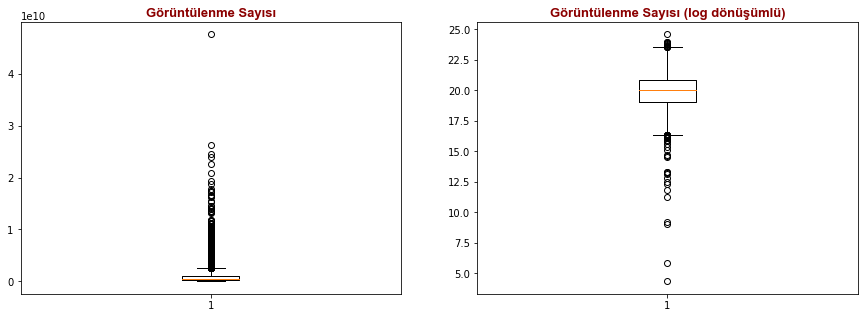

In [10]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(youtube["goruntulenme_sayisi"])
plt.title("Görüntülenme Sayısı", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.boxplot(np.log(youtube["goruntulenme_sayisi"]))
plt.title("Görüntülenme Sayısı (log dönüşümlü)", fontdict=baslik_font)
plt.show()

In [11]:
q75_log, q25_log = np.percentile(np.log(youtube["goruntulenme_sayisi"]), [75 ,25])
caa_log = q75_log - q25_log
log_esik_degerleri = pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi', 'aykiri_deger_sayisi_log'])

for esik_degeri in np.arange(1,5,0.5):
    min_deger_log = q25_log - (caa_log*esik_degeri) 
    maks_deger_log = q75_log + (caa_log*esik_degeri)
    min_deger = q25 - (caa*esik_degeri) #log dönüşümü olmadan
    maks_deger = q75 + (caa*esik_degeri) #log dönüşümü olmadan
    
    aykiri_deger_sayisi_log = len((np.where((np.log(youtube["goruntulenme_sayisi"]) > maks_deger_log)| 
                                       (np.log(youtube["goruntulenme_sayisi"]) < min_deger_log))[0]))
    aykiri_deger_sayisi = len((np.where((youtube["goruntulenme_sayisi"] > maks_deger)| 
                                       (youtube["goruntulenme_sayisi"] < min_deger))[0]))
    log_esik_degerleri = log_esik_degerleri.append({'esik_degeri': esik_degeri,
                                                    'aykiri_deger_sayisi' : aykiri_deger_sayisi, #log dönüşümü olmadan
                                                    'aykiri_deger_sayisi_log': aykiri_deger_sayisi_log 
                                                    }, ignore_index=True)
log_esik_degerleri

,esik_degeri,aykiri_deger_sayisi,aykiri_deger_sayisi_log
0,1.0,624.0,326.0
1,1.5,475.0,58.0
2,2.0,371.0,19.0
3,2.5,296.0,14.0
4,3.0,242.0,13.0
5,3.5,209.0,8.0
6,4.0,182.0,6.0
7,4.5,151.0,4.0


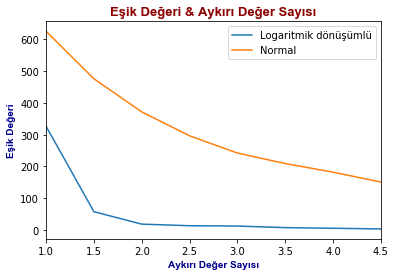

In [12]:
log_esik_degerleri.plot(x = 'esik_degeri', y=['aykiri_deger_sayisi_log', 'aykiri_deger_sayisi'])
plt.title('Eşik Değeri & Aykırı Değer Sayısı', fontdict=baslik_font )
plt.ylabel('Eşik Değeri', fontdict=eksen_font )
plt.xlabel('Aykırı Değer Sayısı', fontdict=eksen_font )
plt.legend(('Logaritmik dönüşümlü', 'Normal'))
plt.show()